Разностная схема записывается следующим образом: \

$ (u_{m−1}^{k+1} − u_{m−1}^{k} + u_m^{k+1} − u_m^k)/2 τ + c(u_m^{k+1} − u_{m−1}^{k+1} + u_{m}^{k} − u_{m−1}^{k})/2h = f_{m+1/2}^{k+1/2},k=0, ... ,K− 1,m=0,. .. ,M $

In [ ]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import optimize

from matplotlib import rc
rc('animation', html='jshtml')

## Условия задачи

Значения взяты из

https://ozlib.com/823935/informatika/uravnenie_perenosa

In [ ]:
c = 0.6
def F(t, x):
  return t*x

def fi(x):
  return (x**3) / (12 * (c**2))
def ksi(t):
  return c * (t**3) / 12

t_max = 2
tau = 0.01
x_max = 2
h = 0.01

In [ ]:
N_t = int(t_max / tau + 1)
N_x = int(x_max / h + 1)
print(N_t, N_x)
matrix = np.zeros([N_t, N_x])

201 201


In [ ]:
for m in range(0, N_x):
  matrix[0, m] = fi(h * m)
for k in range(0, N_t):
  matrix[k, 0] = ksi(tau * k)

# чтобы убедиться, что неизвестные значения не используются в вычислениях
for m in range(1, N_x):
  for k in range(1, N_t):
    matrix[k, m] = None

На 'углу' матрицы известно 3 из 4 значений сетки. Так можно избежать решения системы. Выражение неизвестного элемента через остальные:

$ u_{m}^{k+1} (\frac{h + c\tau}{2h\tau}) = f_{m+1/2}^{k+1/2} - (u_{m−1}^{k+1} − u_{m−1}^{k} − u_m^k)/2 τ - c(− u_{m−1}^{k+1} + u_{m}^{k} − u_{m−1}^{k})/2h $

$ u_{m}^{k+1} = \frac{2h\tau}{h + c\tau}(f_{m+1/2}^{k+1/2} - (u_{m−1}^{k+1} − u_{m−1}^{k} − u_m^k)/2 τ - c(− u_{m−1}^{k+1} + u_{m}^{k} − u_{m−1}^{k})/2h) $

В реализации индекс $ k $ сдвинут на $-1$.


In [ ]:
for m in range(1, N_x):
  for k in range(1, N_t):
    matrix[k, m] = (2*h*tau/(h + c * tau)) * (F((k-1/2)*tau, (m-1/2)*h) 
    - (matrix[k, m-1] - matrix[k-1, m-1] - matrix[k-1, m]) / (2*tau)
    - c * (-matrix[k, m-1] + matrix[k-1, m] - matrix[k-1, m-1]) / (2*h) )
print(matrix)

[[0.00000000e+00 2.31481481e-07 1.85185185e-06 ... 1.79685000e+00
  1.82421273e+00 1.85185185e+00]
 [5.00000000e-08 3.57870370e-07 1.54247685e-06 ... 1.78066334e+00
  1.80786141e+00 1.83533503e+00]
 [4.00000000e-07 9.76967593e-07 3.31174769e-06 ... 1.76477279e+00
  1.79180769e+00 1.81911731e+00]
 ...
 [3.88119600e-01 3.78565100e-01 3.69501433e-01 ... 3.21995411e+00
  3.24396736e+00 3.26809193e+00]
 [3.94029950e-01 3.84377450e-01 3.75218283e-01 ... 3.24484252e+00
  3.26898813e+00 3.29324425e+00]
 [4.00000000e-01 3.90249000e-01 3.80993833e-01 ... 3.26984887e+00
  3.29412827e+00 3.31851744e+00]]


## Визуализация полученной сетки

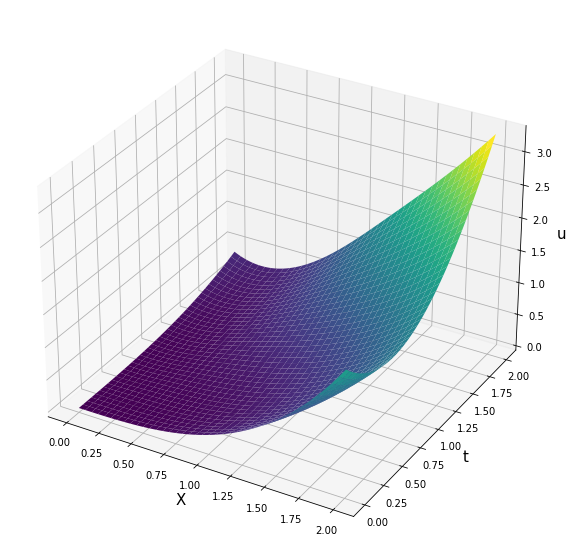

In [ ]:
X = np.arange(0, x_max + h / 2, h)
Y = np.arange(0, t_max + tau / 2, tau)
X, Y = np.meshgrid(X, Y)

hf = plt.figure(figsize=[18, 10])
ax = hf.add_subplot(111, projection='3d')
ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('t', fontsize=15)
ax.set_zlabel('u', fontsize=15)

ax.plot_surface(X, Y, matrix, cmap='viridis', linewidths=0.2);

In [ ]:
fig = plt.figure(figsize=[9, 5])
ax1 = fig.add_subplot(1, 1, 1)
 
def U_ref(t, x):
  tmp = ((x - c * t) ** 3) * np.sign(x - c*t)
  if x - c * t < -c * t_max or x - c*t > x_max:
    tmp = 0.
  return 1 / (8 * c**2) * (x + c*t) * (((x + c*t)**2)/3 - (x - c*t)**2) + tmp / (6 * (c**2))

def animate(i):
    id = int(i) % len(matrix)
    ax1.clear()
    ax1.plot(X[id], matrix[id], label='calc')
    ax1.plot(X[id]
             , list(map(lambda x: U_ref(Y[id, 0], x), X[id]))
             , label='ref')
 
    plt.legend()
    plt.title('t = {}'.format(Y[id, 0]))
    plt.xlabel('x')
    plt.ylabel('u')

 
ani = animation.FuncAnimation(fig, animate, frames=N_t, interval=20)
ani


Output hidden; open in https://colab.research.google.com to view.

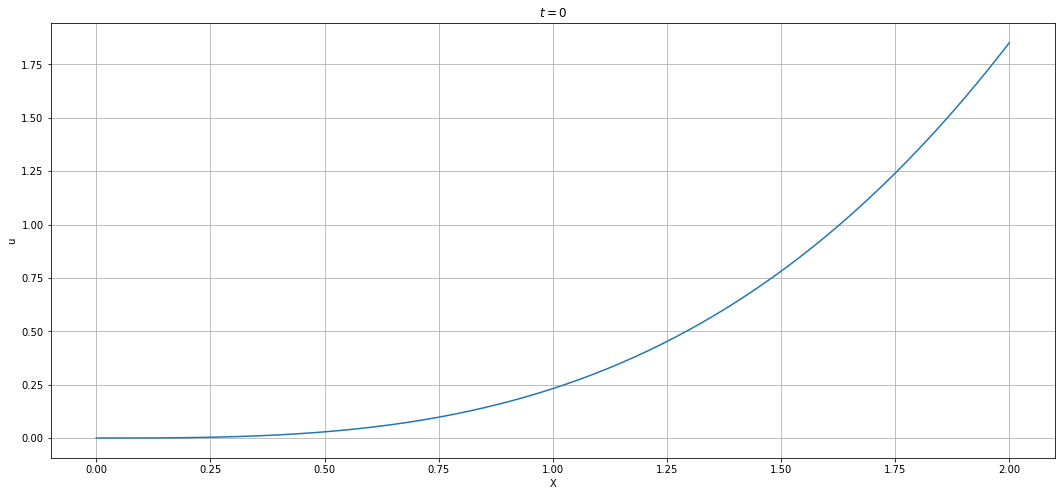

In [ ]:
k = np.arange(start=1895, stop=2010, step=1)

plt.figure(figsize=[18, 8])
plt.grid()
plt.title("$t=0$")
plt.ylabel('u')
plt.xlabel('X')
plt.plot(X[0], matrix[0])
plt.show()

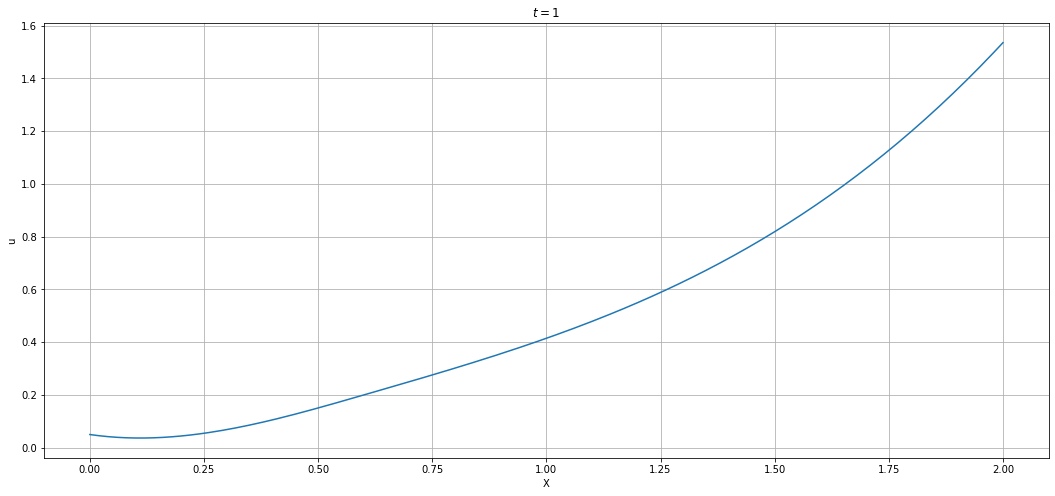

In [ ]:
k = np.arange(start=1895, stop=2010, step=1)

plt.figure(figsize=[18, 8])
plt.grid()
plt.title("$t=1$")
plt.ylabel('u')
plt.xlabel('X')
plt.plot(X[0], matrix[int(1 / tau)])
plt.show()